In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from src import renormalizable_model, utils
from tqdm import tqdm
from matplotlib import pyplot as plt

In [3]:
weighted_adj_matrix = np.loadtxt(open("data/fg_empiricalNTW(node_num=1000).csv", "rb"), delimiter=",").reshape((1000,1000))
out_strengths = np.sum(weighted_adj_matrix, axis=1)
in_strengths = np.sum(weighted_adj_matrix, axis=0)
computed_strengths = np.stack([out_strengths, in_strengths], axis=1)

In [4]:
a = np.array([[1,2],
              [3,4]])
np.sum(a, axis=1)

array([3, 7])

In [12]:
sl_ensemble = renormalizable_model.generate_RM_ensemble(1000, computed_strengths, z=0.01, self_loops=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [02:23<00:00,  6.97it/s]


In [18]:
sl_ens_out_strengths = [np.sum(utils.weighted_adj_matrix(graph), axis=1) for graph in tqdm(sl_ensemble)]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:04<00:00, 15.51it/s]


In [33]:
sl_avg_out_strengths = np.mean(sl_ens_out_strengths, axis=0)

In [30]:
def plot_out_strengths_vs_avg_out_strengths(out_strengths, avg_out_strengths):
    plt.plot(out_strengths, avg_out_strengths, 'o')
    plt.xlabel("Empirical out-strengths")
    plt.ylabel("Ensemble average out-strengths")
    plt.plot([0, max(out_strengths)], [0, max(out_strengths)])
    plt.show()


In [ ]:
plot_out_strengths_vs_avg_out_strengths(out_strengths, sl_avg_out_strengths)

In [13]:
non_sl_ensemble = renormalizable_model.generate_RM_ensemble(1000, computed_strengths, z=0.01, self_loops=False, parallel=True)

100%|██████████| 1000/1000 [02:26<00:00,  6.84it/s]


In [26]:
non_sl_ens_out_strengths = [np.sum(utils.weighted_adj_matrix(graph), axis=1) for graph in tqdm(non_sl_ensemble)]

100%|██████████| 1000/1000 [01:11<00:00, 14.06it/s]


In [28]:
non_sl_avg_out_strengths = np.mean(non_sl_ens_out_strengths, axis=0)

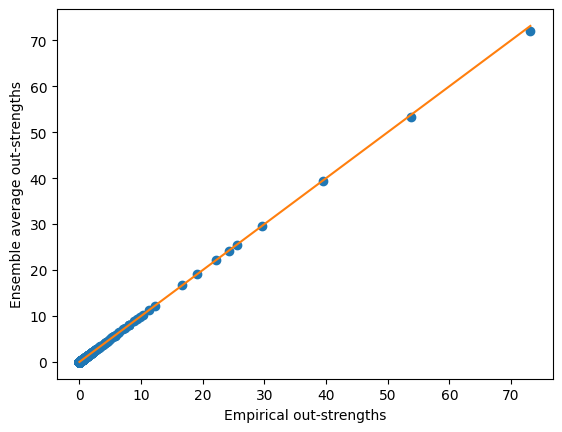

In [31]:
plot_out_strengths_vs_avg_out_strengths(out_strengths, non_sl_avg_out_strengths)

In [4]:
gr_sl = renormalizable_model.create_RM_graph(computed_strengths, z=0.01, self_loops=True)
gr_non_sl = renormalizable_model.create_RM_graph(computed_strengths, z=0.01, self_loops=False)

In [5]:
utils.adj_matrix(gr_sl)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
sl_num_sl = np.sum(np.diag(utils.adj_matrix(gr_sl)))
print(sl_num_sl)

19


In [10]:
non_sl_num_sl = np.sum(np.diag(utils.adj_matrix(gr_non_sl)))
print(non_sl_num_sl)

0


In [14]:
sl_self_loops_total = np.sum([np.sum(np.diag(utils.adj_matrix(graph))) for graph in tqdm(sl_ensemble)])
non_sl_self_loops_total = np.sum([np.sum(np.diag(utils.adj_matrix(graph))) for graph in tqdm(non_sl_ensemble)])

100%|██████████| 1000/1000 [00:52<00:00, 19.08it/s]


In [15]:
print(sl_self_loops_total)
print(non_sl_self_loops_total)

23128
0
